Problem tanımı ve çözüm önerisi

Veriye dayalı pazar potansiyeli

Elde edilen içgörüler (grafikler, metrikler)

Öngörülen büyüme veya fırsatlar

Hedef kitle ve müşteri profili

Veriye dayalı değer önerisi (value proposition)



1) Veri Keşfi Genel Bilgiler
2)Zaman Serisi Trend Analizleri
3)Ürün Tercihleri
4)Tesis Türü
5)Bölgesel Analiz
6)Dil Ve Ürün Hacmi analizi
7)Segment ve Churn analizi
8) Yatırımcıya sunulacak içgörüler 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 100000)

In [2]:
df = pd.read_excel('/Users/zaferavci/Documents/GitHub/Miuul-CaseStudy-1/Miuul-Case-Study/ctk/ctk_melted (1).xlsx')

In [3]:
df.columns = [col.lower() for col in df.columns]

In [4]:
df['order_date__c'].min(), df['order_date__c'].max()

(Timestamp('2017-01-16 00:00:00'), Timestamp('2025-03-14 00:00:00'))

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42612 entries, 0 to 42611
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_account__c    42612 non-null  object        
 1   customer_name__c       42612 non-null  object        
 2   facility_type__c       42134 non-null  object        
 3   id                     42612 non-null  object        
 4   order no               42612 non-null  int64         
 5   order_date__c          42612 non-null  datetime64[ns]
 6   order_year__c          42612 non-null  int64         
 7   pb_pieces__c           42612 non-null  int64         
 8   shipping_city__c       42612 non-null  object        
 9   shipping_state__c      42612 non-null  object        
 10  shipping_zip_code__c   42612 non-null  object        
 11  total_order_pieces__c  42612 non-null  int64         
 12  products               42612 non-null  object        
 13  q

In [6]:
 #df.to_csv('mergedata.csv', index=False, encoding='utf-8')

In [7]:
df.describe().T  

,count,mean,min,25%,50%,75%,max,std
order no,42612.000,2000987.426,1021.000,529275.000,535243.000,540885.250,18000071430.000,154000503.230
order_date__c,42612,2023-01-19 20:35:08.701774080,2017-01-16 00:00:00,2022-02-15 18:00:00,2023-05-17 00:00:00,2024-05-19 00:00:00,2025-03-14 00:00:00,NaN
order_year__c,42612.000,2022.571,2017.000,2022.000,2023.000,2024.000,2025.000,1.560
pb_pieces__c,42612.000,81.256,0.000,0.000,0.000,50.000,15000.000,396.037
total_order_pieces__c,42612.000,520.808,0.000,125.000,238.500,500.000,47350.000,1372.703
quantity,42612.000,2.455,1.000,1.000,1.000,2.000,1760.000,11.163
pieces,42612.000,108.459,0.000,25.000,50.000,100.000,44000.000,374.753
size,42612.000,53.130,0.000,10.000,25.000,50.000,3750.000,70.289


In [8]:
df.describe(include='O').T  

,count,unique,top,freq
customer_account__c,42612,7156,001f4000015h1KeAAI,332
customer_name__c,42612,8493,003f400001JzDt0AAF,138
facility_type__c,42134,10,OBGYN Clinic,9513
id,42612,12674,a10Pd000000VHJ7IAO,24
shipping_city__c,42612,2887,Columbus,480
shipping_state__c,42612,51,FL,7807
shipping_zip_code__c,42612,4190,50314,134
products,42612,87,CTK03_English_Brochures_Pack_Size,8259


FACİLİTY TYPE MİSSİNG VALUE MOD İLE DOLDURULDU

In [9]:
# En sık geçen değeri (mod) bulalım
mod_value = df['facility_type__c'].mode()[0]

# Boşlukları bu değerle dolduralım
df['facility_type__c'] = df['facility_type__c'].fillna(mod_value)

KOLONLARI KATEGORİK TARİH VE SAYISAL OLARAK AYIRMA

In [10]:
# İlk olarak tüm object ve category kolonlarını al
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# ID gibi analizde kullanmak istemediğimiz kolonları çıkar
id_cols = ['customer_account__c', 'customer_name__c', 'id']
cat_cols = [col for col in cat_cols if col not in id_cols]

# Sayısal kolonlar
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Tarih kolonları
date_cols = df.select_dtypes(include=['datetime']).columns.tolist()

# Sonuçları görelim
print("Kategorik Değişkenler:", cat_cols)
print("Sayısal Değişkenler:", num_cols)
print("Tarih Değişkenleri:", date_cols)

Kategorik Değişkenler: ['facility_type__c', 'shipping_city__c', 'shipping_state__c', 'shipping_zip_code__c', 'products']
Sayısal Değişkenler: ['order no', 'order_year__c', 'pb_pieces__c', 'total_order_pieces__c', 'quantity', 'pieces', 'size']
Tarih Değişkenleri: ['order_date__c']


In [11]:
# Kategori belirleme fonksiyonu
def categorize_product(products):
    products = str(products).lower()

    if "app_card" in products or "app card" in products or "card" in products:
        return "App Cards"
    elif "brochure" in products:
        return "Brochures"
    elif "poster" in products:
        return "Posters"
    elif "wristband" in products:
        return "Wristband"
    elif "magnet" in products:
        return "Magnet"
    else:
        return "Other"




In [12]:
region_map = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
    'Midwest': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
    'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
    'West': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']
}
state_to_region = {state: region for region, states in region_map.items() for state in states}
df['region'] = df['shipping_state__c'].map(state_to_region)

In [16]:
def detect_language(products):
    products = str(products).lower()
    if "english" in products:
        return "English"
    elif "spanish" in products:
        return "Spanish"
    elif "french" in products:
        return "French"
    elif "arabic" in products:
        return "Arabic"
    elif "chinese" in products:
        return "Chinese"
    elif "vietnamese" in products:
        return "Vietnamese"
    elif "russian" in products:
        return "Russian"
    elif "portuguese" in products:
        return "Portuguese"
    elif "korean" in products:
        return "Korean"
    else:
        return "Unknown"

In [23]:
# [2] Her müşteri için kaç sipariş verdiğini say
repeat_df = df.groupby(['customer_account__c', 'facility_type__c'])['order no'].nunique().reset_index(name='order_count')

# [3] Her facility type için tekrar eden müşteri oranı
repeat_df['is_repeat'] = repeat_df['order_count'] > 1
repeat_rate_by_facility = repeat_df.groupby('facility_type__c')['is_repeat'].mean().reset_index(name='repeat_rate')

# [4] Özet tabloya dahil et
facility_summary = facility_summary.merge(repeat_rate_by_facility, on='facility_type__c')
df.head()# Tarihi formatla
df['order_date__c'] = pd.to_datetime(df['order_date__c'], errors='coerce')

# Kategori ve dil sütunlarını oluştur
df['product_category'] = df['products'].apply(categorize_product)
df['language'] = df['products'].apply(detect_language)

# Yıl bilgisi
df['order_year'] = df['order_date__c'].dt.year
# [2.1] order_date sütunundan yıl bilgisi çıkar
df['order_date__c'] = pd.to_datetime(df['order_date__c'], errors='coerce')
df['order_year'] = df['order_date__c'].dt.year
# [2.2] Yıllara göre benzersiz sipariş sayısı
orders_by_year = df.groupby('order_year')['order no'].nunique().reset_index(name='total_orders')

# [2.3] Sipariş sayısına göre yıllık büyüme oranı
orders_by_year['growth_rate_orders'] = orders_by_year['total_orders'].pct_change().round(3)




In [24]:
# [2.4] Yıllara göre toplam ürün hacmi (adet)
pieces_by_year = df.groupby('order_year')['pieces'].sum().reset_index(name='total_pieces')

# [2.5] Hacme göre yıllık büyüme oranı
pieces_by_year['growth_rate_pieces'] = pieces_by_year['total_pieces'].pct_change().round(3)

pieces_by_year

#  Yıla Göre Sipariş Başına Ortalama Ürün Hacmi Tablosu
df['order_year'] = df['order_date__c'].dt.year

# Her yıl için sipariş bazlı ortalama hacim
avg_by_year = (
    df.groupby(['order_year', 'order no'])['pieces'].sum()
    .groupby('order_year')
    .mean()
    .reset_index(name='avg_pieces_per_order')
)


# [2.6] Büyümeleri tek tabloda birleştir
yearly_summary = pd.merge(orders_by_year, pieces_by_year, on='order_year')



ZAMAN TRENDLERİ ANALİZİ

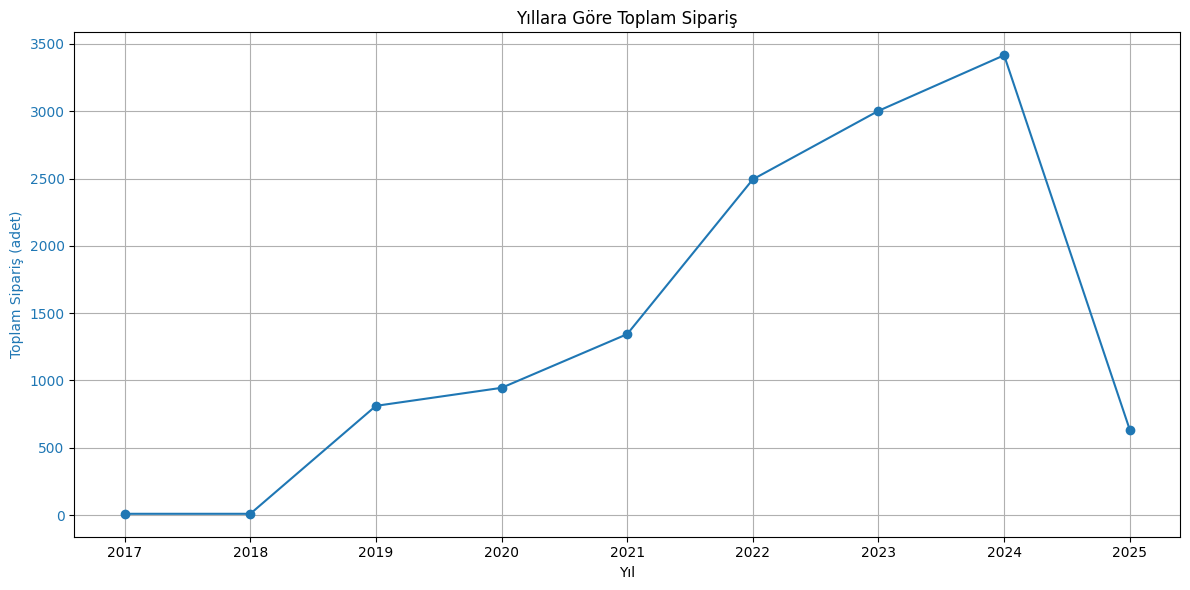

In [25]:


fig, ax1 = plt.subplots(figsize=(12, 6))

# Birinci y-ekseni: toplam sipariş adedi
color = 'tab:blue'
ax1.set_xlabel('Yıl')
ax1.set_ylabel('Toplam Sipariş (adet)', color=color)
ax1.plot(yearly_summary['order_year'], yearly_summary['total_orders'], color=color, marker='o', label='Toplam Sipariş (adet)')
ax1.tick_params(axis='y', labelcolor=color)


# Başlık ve gösterim
plt.title('Yıllara Göre Toplam Sipariş')
fig.tight_layout()
plt.grid(True)
plt.show()


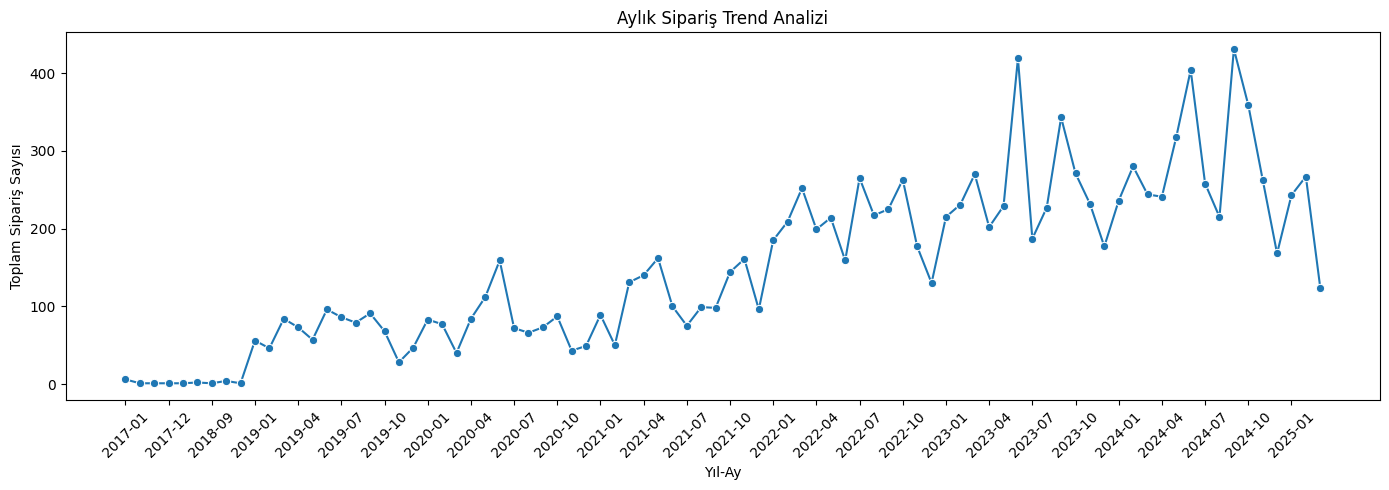

In [26]:
# Sipariş tarihini datetime formatına çevir
df['order_date__c'] = pd.to_datetime(df['order_date__c'], errors='coerce')

# Yıl-Ay bazlı toplam sipariş sayısı
df['year_month'] = df['order_date__c'].dt.to_period('M')
monthly_trend = df.groupby('year_month').agg(total_orders=('order no', 'nunique')).reset_index()

# Dönem string'e çevrilip grafik çizilir
monthly_trend['year_month'] = monthly_trend['year_month'].astype(str)

plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_trend, x='year_month', y='total_orders', marker='o')

# Her 3. etiketi göster
xticks_to_show = monthly_trend['year_month'].tolist()[::3]
plt.xticks(ticks=range(0, len(monthly_trend['year_month']), 3), labels=xticks_to_show, rotation=45)

plt.title("Aylık Sipariş Trend Analizi")
plt.xlabel("Yıl-Ay")
plt.ylabel("Toplam Sipariş Sayısı")
plt.tight_layout()
plt.show()


In [27]:
df.head()

,customer_account__c,customer_name__c,facility_type__c,id,order no,order_date__c,order_year__c,pb_pieces__c,shipping_city__c,shipping_state__c,shipping_zip_code__c,total_order_pieces__c,products,quantity,pieces,size,region,year_month,order_year,product_category,language
0,0015G00001ZfTJKQA3,0035G00001eeOrIQAU,OBGYN Clinic,a105G00000iFAvvQAG,515014,2021-02-02,2021,0,Des Moines,IA,50309,125,CTK03_English_Brochures_Pack_Size,5,125,25,Midwest,2021-02,2021,Brochures,English
1,0015G00001ZfSnWQAV,0035G00001eeOskQAE,Public Health Agency,a105G00000iFAwAQAW,515010,2021-02-02,2021,0,Wichita,KS,67214,360,CTK01_English_App_Cards_Pack_Size,2,100,50,Midwest,2021-02,2021,App Cards,English
2,0015G00001ZfSnWQAV,0035G00001eeOskQAE,Public Health Agency,a105G00000iFAwAQAW,515010,2021-02-02,2021,0,Wichita,KS,67214,360,CTK02_Spanish_App_Cards_Pack_Size,2,100,50,Midwest,2021-02,2021,App Cards,Spanish
3,0015G00001ZfSnWQAV,0035G00001eeOskQAE,Public Health Agency,a105G00000iFAwAQAW,515010,2021-02-02,2021,0,Wichita,KS,67214,360,CTK03_English_Brochures_Pack_Size,4,100,25,Midwest,2021-02,2021,Brochures,English
4,0015G00001ZfSnWQAV,0035G00001eeOskQAE,Public Health Agency,a105G00000iFAwAQAW,515010,2021-02-02,2021,0,Wichita,KS,67214,360,CTK04_Spanish_Brochures_Pack_Size,2,50,25,Midwest,2021-02,2021,Brochures,Spanish


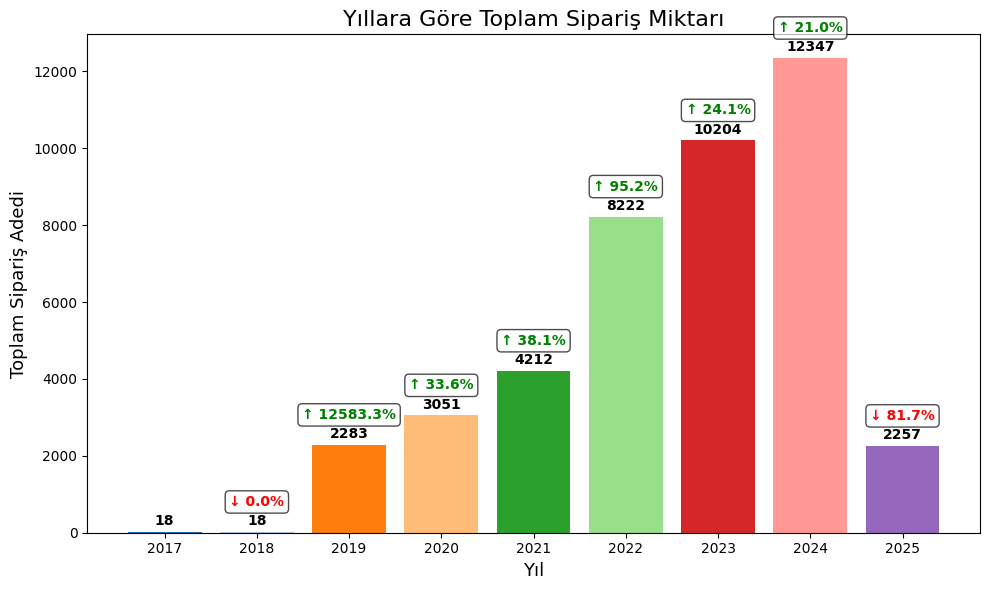

In [28]:
# Datetime dönüşümü ve yıl çıkarımı
df['order_date__c'] = pd.to_datetime(df['order_date__c'], errors='coerce')
df['order_year'] = df['order_date__c'].dt.year

# Yıllık toplam sipariş miktarı ve büyüme oranı
yearly_orders = df.groupby('order_year')['order no'].count()
growth_rate = yearly_orders.pct_change().fillna(0) * 100

# Her bar için farklı renk
colors = plt.cm.tab20.colors  # 20 farklı renk içeren palet

plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_orders.index.astype(str), yearly_orders.values, color=colors[:len(yearly_orders)])

plt.title('Yıllara Göre Toplam Sipariş Miktarı', fontsize=16)
plt.xlabel('Yıl', fontsize=13)
plt.ylabel('Toplam Sipariş Adedi', fontsize=13)

# Değerleri ve yüzdeleri ekle
for i, bar in enumerate(bars):
    height = bar.get_height()
    # Sipariş adedi
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    if i > 0:
        growth = growth_rate.iloc[i]
        arrow = '↑' if growth > 0 else '↓'
        color = 'green' if growth > 0 else 'red'
        # Yüzde büyüme/azalma
        plt.text(bar.get_x() + bar.get_width()/2, height + 600, f'{arrow} {abs(growth):.1f}%',
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color=color,
                 bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()



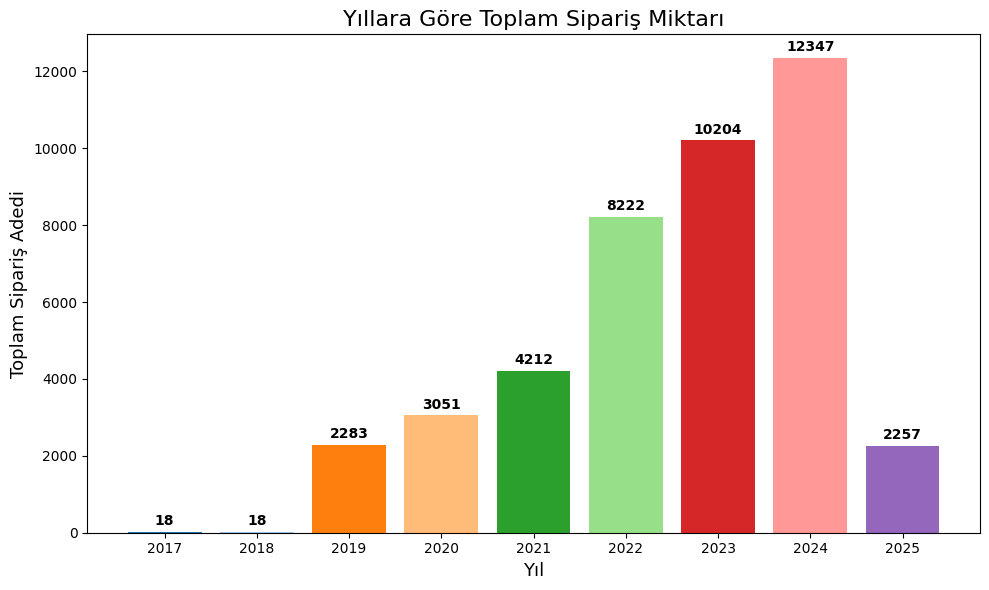

In [29]:

plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_orders.index.astype(str), yearly_orders.values, color=colors[:len(yearly_orders)])

plt.title('Yıllara Göre Toplam Sipariş Miktarı', fontsize=16)
plt.xlabel('Yıl', fontsize=13)
plt.ylabel('Toplam Sipariş Adedi', fontsize=13)

# Değerleri ve yüzdeleri ekle
for i, bar in enumerate(bars):
    height = bar.get_height()
    # Sipariş adedi
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    

plt.tight_layout()
plt.savefig("yearly_count_orderno.png", dpi=300)
plt.show()


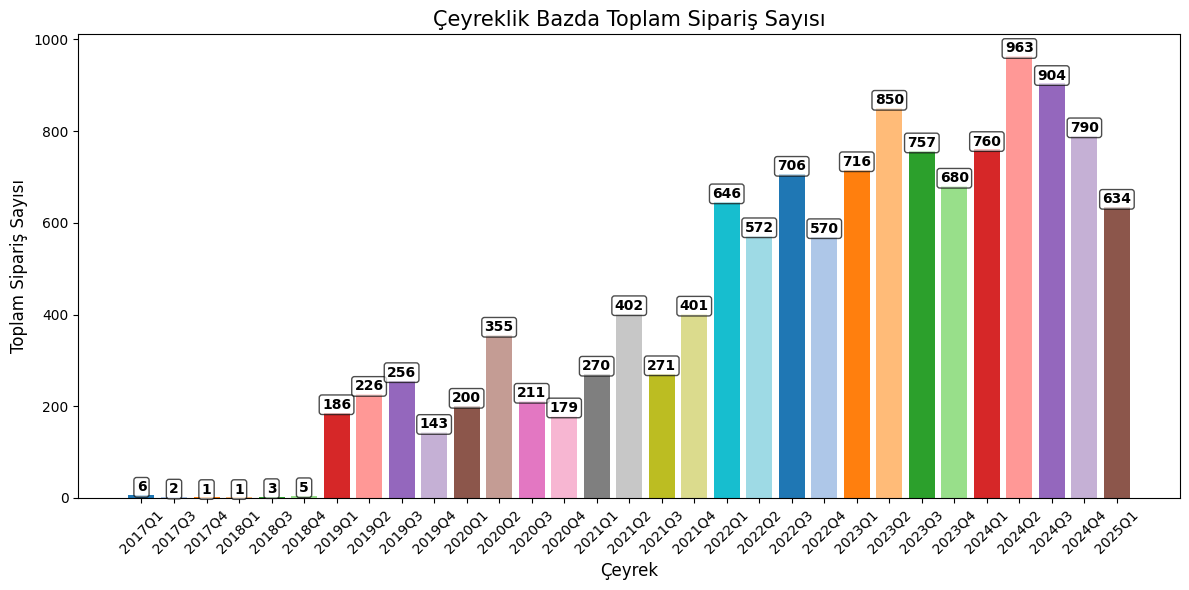

In [30]:


# Sipariş tarihini datetime formatına çevir
df['order_date__c'] = pd.to_datetime(df['order_date__c'], errors='coerce')

# Çeyrek bilgisi ekle
df['order_quarter'] = df['order_date__c'].dt.to_period('Q')

# Çeyreklik toplam sipariş sayısını hesapla
quarterly_orders = df.groupby('order_quarter')['order no'].nunique().reset_index()
quarterly_orders['order_quarter'] = quarterly_orders['order_quarter'].astype(str)

# Her çubuk için farklı renk
colors = plt.cm.tab20.colors  # 20 farklı renk içeren palet

# Grafik oluştur
plt.figure(figsize=(12, 6))
bars = plt.bar(quarterly_orders['order_quarter'], quarterly_orders['order no'],
               color=colors * (len(quarterly_orders) // len(colors) + 1))

plt.title('Çeyreklik Bazda Toplam Sipariş Sayısı', fontsize=15)
plt.xlabel('Çeyrek', fontsize=12)
plt.ylabel('Toplam Sipariş Sayısı', fontsize=12)
plt.xticks(rotation=45)

# Çubukların üzerine değerleri yaz
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))

plt.tight_layout()
plt.show()


In [31]:
quarterly_orders.head()

,order_quarter,order no
0,2017Q1,6
1,2017Q3,2
2,2017Q4,1
3,2018Q1,1
4,2018Q3,3


In [32]:
quarterly_orders["order_quarter"] = quarterly_orders["order_quarter"].astype(str)

In [33]:
quarterly_orders[quarterly_orders["order_quarter"].str.contains("Q1", case=False)]

,order_quarter,order no
0,2017Q1,6
3,2018Q1,1
6,2019Q1,186
10,2020Q1,200
14,2021Q1,270
18,2022Q1,646
22,2023Q1,716
26,2024Q1,760
30,2025Q1,634


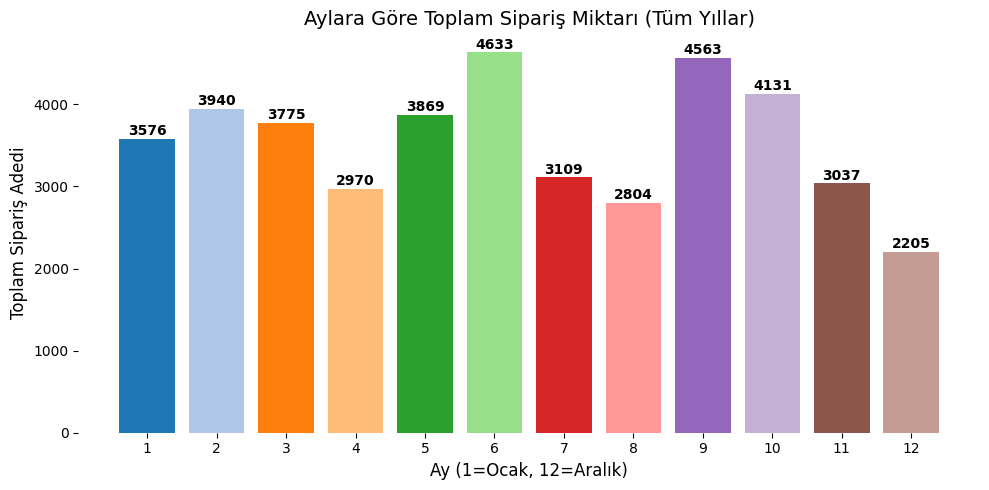

In [34]:
# Sipariş tarihinden ay bilgisini al
df['order_month'] = df['order_date__c'].dt.month

# Aylık sipariş sayısını hesapla (Ocak=1, ..., Aralık=12)
monthly_orders = df.groupby('order_month')['order no'].count().reindex(range(1, 13), fill_value=0)

# Renk paleti: 12 farklı pastel renk
colors = plt.cm.tab20.colors  # 20 farklı renk içeren palet

# Grafik oluştur
plt.figure(figsize=(10, 5))
bars = plt.bar(monthly_orders.index, monthly_orders.values, color=colors[:12])

plt.title('Aylara Göre Toplam Sipariş Miktarı (Tüm Yıllar)', fontsize=14)
plt.xlabel('Ay (1=Ocak, 12=Aralık)', fontsize=12)
plt.ylabel('Toplam Sipariş Adedi', fontsize=12)
plt.xticks(monthly_orders.index)

# Çubukların üzerine değerleri yaz
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Çerçeveyi kaldır
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig("monthly_count_ornerno.png", dpi=300)
plt.show()

Grafik 1: Yıllara Göre Sipariş Miktarı
2021 ve 2022, en yüksek sipariş yoğunluğunun yaşandığı yıllar olmuş.

2023'te düşüş dikkat çekiyor. Bu, bütçe kesintileri, operasyonel sınırlamalar veya dışsal etkilerden (pandemi sonrası adaptasyon vb.) kaynaklanıyor olabilir.

2024 verisi ise ya eksik ya da yıl henüz tamamlanmadığı için daha düşük kalmış olabilir.

Grafik 2: Aylara Göre Sipariş Miktarı (Tüm Yıllar Toplamı)
Şubat, Mart ve Ekim aylarında belirgin artış var. Bu, kampanya zamanlamalarının ilkbahar ve sonbahara yoğunlaştığını gösteriyor.

Yaz ayları (Haziran–Ağustos) ve Aralık genellikle düşük hacimli; bu da tatil sezonu, yaz tatilleri veya bütçe dönemleriyle örtüşebilir.

İçgörüler:
Kaynak planlaması ve stok hazırlığı Mart-Nisan ve Ekim ayları öncesinde artırılmalı.

Yıl içi kampanya stratejileri, sezonsal sipariş artışlarını baz alarak hazırlanmalı.

Düşük sezonlar (Yaz/Kış) için özel bağış kampanyaları oluşturulabilir (örneğin yaz temalı bilgilendirme setleri, kışa hazırlık kitleri vb.).

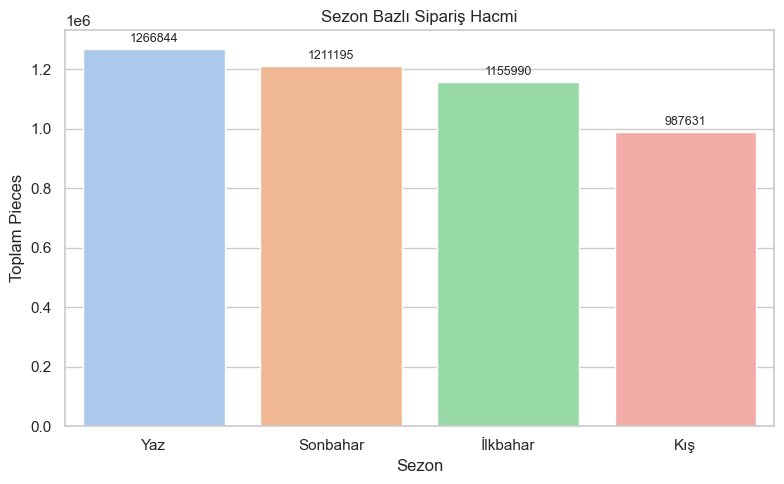

In [35]:


# 1. Sipariş tarihinden ay bilgisini çıkar
df['order_month'] = df['order_date__c'].dt.month

# 2. Aydan sezona dönüştürme fonksiyonu
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:
        return 'Sonbahar'

# 3. Sezon sütununu oluştur
df['season'] = df['order_month'].apply(assign_season)

# 4. Sezon bazlı toplam sipariş hacmini hesapla
season_summary = (
    df.groupby('season')['pieces']
    .sum()
    .reset_index()
    .sort_values(by='pieces', ascending=False)
)

# 5. Grafikle göster
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
bar = sns.barplot(data=season_summary, x='season', y='pieces', palette='pastel')

# 6. Etiketleri üstte göster (tam sayı)
for container in bar.containers:
    bar.bar_label(container, fmt='%.0f', padding=3, fontsize=9)

plt.title('Sezon Bazlı Sipariş Hacmi')
plt.xlabel('Sezon')
plt.ylabel('Toplam Pieces')
plt.tight_layout()
plt.show()


ÜRÜN TERCİHLERİ

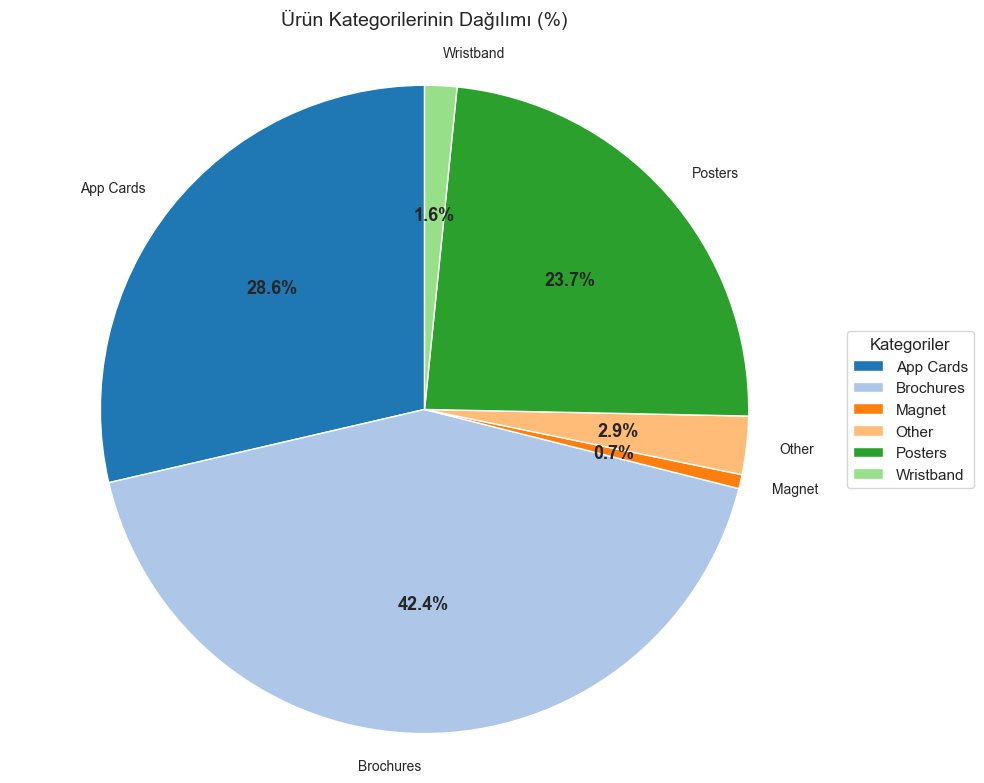

In [36]:
# Ürün kategorilerine göre yüzdesel dağılım
category_dist = df.groupby('product_category')['pieces'].sum()
total_pieces = category_dist.sum()
category_percentages = (category_dist / total_pieces * 100).round(1)

# Pasta grafiği oluşturma
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20.colors
wedges, texts, autotexts = plt.pie(category_percentages, 
                                  labels=category_percentages.index,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90)

# Grafiğin başlığı ve görünümü
plt.title('Ürün Kategorilerinin Dağılımı (%)', pad=20, size=14)

# Font boyutlarını ayarla
plt.setp(autotexts, size=13, weight='bold')
plt.setp(texts, size=10)

# Grafiği daire şeklinde tut
plt.axis('equal')

# Lejantı sağ tarafa yerleştir
plt.legend(category_percentages.index,
          title="Kategoriler",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.savefig("categorypie.png", bbox_inches='tight', dpi=300)
plt.show()

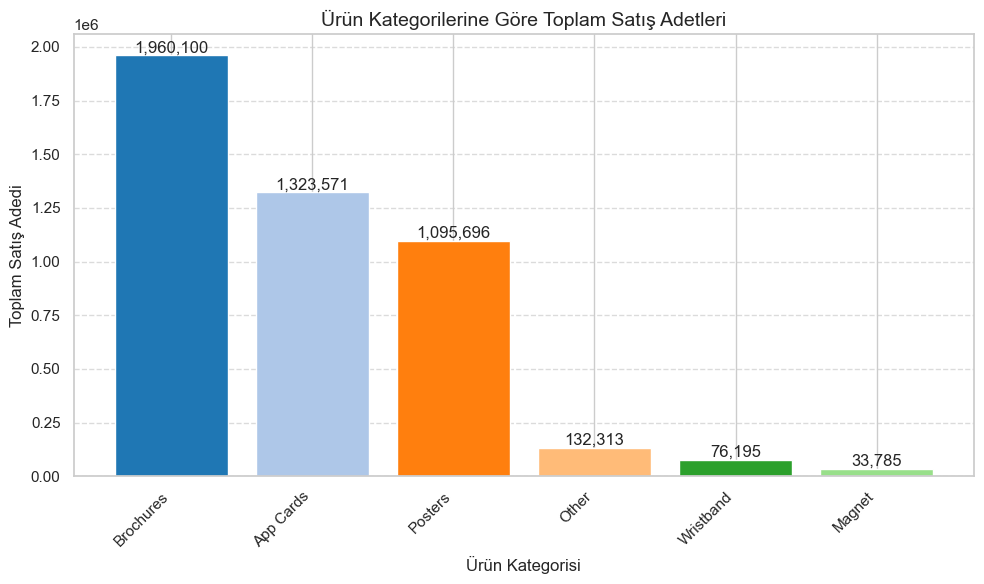

In [37]:
# Ürün kategorilerine göre toplam satış adetleri
category_sales = df.groupby('product_category')['pieces'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20.colors
bars = plt.bar(category_sales.index, category_sales.values, color=colors[:len(category_sales)])

plt.title('Ürün Kategorilerine Göre Toplam Satış Adetleri', fontsize=14)
plt.xlabel('Ürün Kategorisi', fontsize=12)
plt.ylabel('Toplam Satış Adedi', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Bar değerlerini ekle
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("category_sum_order.png", dpi=300)
plt.show()

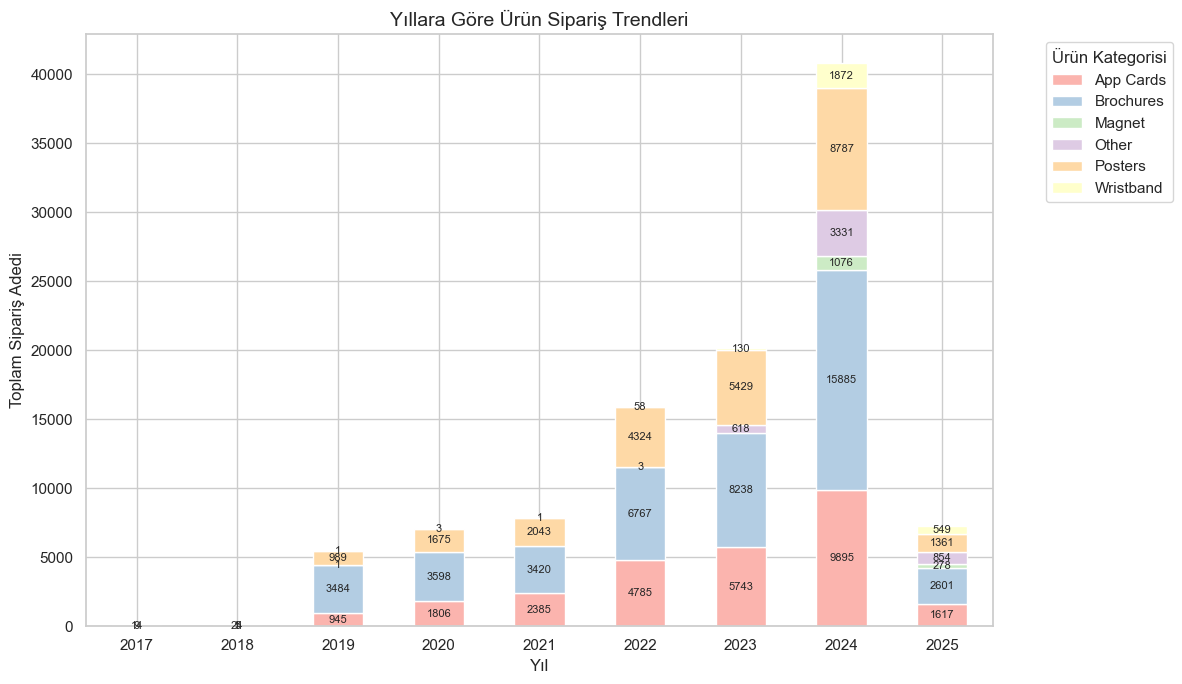

In [38]:
category_year = df.groupby(['order_year__c', 'product_category'])['quantity'].sum().unstack().fillna(0)

# Grafik çizimi
pastel_colors = plt.cm.Pastel1.colors
category_year.plot(kind='bar', stacked=True, color=pastel_colors, figsize=(12, 7))

# Başlık ve etiketler
plt.title('Yıllara Göre Ürün Sipariş Trendleri', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Toplam Sipariş Adedi', fontsize=12)
plt.legend(title='Ürün Kategorisi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Etiketleri çubuklara yaz
for i, year in enumerate(category_year.index):
    cumulative = 0
    for category in category_year.columns:
        value = category_year.loc[year, category]
        if value > 0:
            plt.text(i, cumulative + value / 2, f'{int(value)}',
                     ha='center', va='center', fontsize=8)
            cumulative += value

plt.tight_layout()
plt.show()

1. 2021–2022 Yıllarında Belirgin Talep Artışı
Bu dönem ABD bağış sektöründe pandemi sonrası saha programlarının yeniden açıldığı ve artan sağlık iletişimi ihtiyaçlarının ortaya çıktığı yıllardır.

Brochures ve App Cards siparişlerindeki ani artış, özellikle sağlık ve gençlere yönelik kampanyaların yoğunlaştığını gösteriyor.

Dijital entegrasyonun arttığı bir dönemde, App Cards gibi fiziksel-dijital köprü materyallerin daha fazla kullanılmaya başlanması beklenen bir trenddi – grafik bunu doğruluyor.

2. 2023'te Gerileme – Operasyonel mi Stratejik mi?
2023'te tüm kategorilerde düşüş dikkat çekici. Bu durum:

Bütçe kısıtları,

Operasyonel daralma (tedarik zinciri sorunları),

Veya stratejik olarak kampanya sayısının azaltılması gibi sebeplerle açıklanabilir.

Ayrıca yıl içinde yeni dijital kanalların daha çok tercih edilmesi, fiziksel materyal talebinde düşüşe neden olmuş olabilir.

3. Ürün Dağılımı Hedef Kitlenin Segmentasyonunu Yansıtıyor
App Cards ve Stickers, genç erişimi olan programlar için ideal. Bu kategorilerin güçlü kullanımı, genç ve dijital yetkin kitlelerin hedef alındığını gösteriyor.

Booklets ve Posters, eğitim odaklı veya kamu kurumlarına yönelik bağış programlarının yoğunluğuna işaret eder.

💡 Stratejik Öneriler
Ürün Portföyünü Optimize Et:

Yüksek talep gören ürünlere odaklan, stok ve üretim planlamasını bu yönde yap.

Düşük talep gören ama stratejik öneme sahip ürünleri sadece özel kampanyalara entegre et.

Kampanya Zamanlamasıyla Ürün Türünü Eşleştir:

Örneğin, okul dönemi başlarında App Cards ve Posters yoğun kullanılabilir.

Bahar ve Sonbahar kampanyalarında Booklet ve Brochure gibi içerik dolu materyaller daha etkili olabilir.

Etki Bazlı Analiz:

Gelecekte bu grafik sadece hacim değil, dönüşüm oranları (engagement, site ziyareti, hizmete erişim) ile birlikte okunmalı.

Aynı sayıda App Card ve Brochure çok farklı etki yaratabilir – bu yüzden sadece "kaç adet" değil, "etkisi ne oldu?" sorusu da sorulmalı.



TESİS TÜRÜ

In [39]:
# [1] Her tesis türü için özet metrikler
facility_summary = df.groupby('facility_type__c').agg(
    total_orders=('order no', 'nunique'),
    total_quantity=('pieces', 'sum'),
    unique_customers=('customer_account__c', 'nunique')
).reset_index()

facility_summary['orders_per_customer'] = facility_summary['total_quantity'] / facility_summary['unique_customers']


In [40]:
# [2] Her müşteri için kaç sipariş verdiğini say
repeat_df = df.groupby(['customer_account__c', 'facility_type__c'])['order no'].nunique().reset_index(name='order_count')

# [3] Her facility type için tekrar eden müşteri oranı
repeat_df['is_repeat'] = repeat_df['order_count'] > 1
repeat_rate_by_facility = repeat_df.groupby('facility_type__c')['is_repeat'].mean().reset_index(name='repeat_rate')

# [4] Özet tabloya dahil et
facility_summary = facility_summary.merge(repeat_rate_by_facility, on='facility_type__c')


In [41]:
facility_summary = df.groupby('facility_type__c').agg(
    total_orders=('order no', 'count'),
    total_quantity=('quantity', 'sum'),
    unique_customers=('customer_account__c', pd.Series.nunique)
).reset_index()

# Müşteri başına sipariş ortalaması
facility_summary['orders_per_customer'] = facility_summary['total_orders'] / facility_summary['unique_customers']

# Repeat rate hesapla: her müşteri için birden fazla sipariş verip vermediğini kontrol et
repeat_df = df.groupby(['facility_type__c', 'customer_account__c'])['order no'].nunique().reset_index()
repeat_df['is_repeat'] = repeat_df['order no'] > 1
repeat_rate = repeat_df.groupby('facility_type__c')['is_repeat'].mean().reset_index(name='repeat_rate')

# Repeat rate ile birleştir
facility_summary = pd.merge(facility_summary, repeat_rate, on='facility_type__c')

# Gerekirse sıralama
facility_summary = facility_summary.sort_values(by='total_orders', ascending=False)

# Son tabloyu yazdır
display(facility_summary)

,facility_type__c,total_orders,total_quantity,unique_customers,orders_per_customer,repeat_rate
4,OBGYN Clinic,9991,23991,1945,5.137,0.332
5,Other,8698,28803,1790,4.859,0.179
7,Public Health Agency,8659,20882,1285,6.739,0.356
0,Birthing Hospital,5232,11579,924,5.662,0.350
2,Home Visitor,4890,8434,940,5.202,0.240
9,WIC Clinic,1826,4084,325,5.618,0.258
1,Family Practice Clinic,1576,2635,373,4.225,0.212
6,Pregnancy Resource Center,1196,3262,273,4.381,0.179
3,Non-traditional Practice,531,913,162,3.278,0.037
8,Urgent Care,13,22,4,3.250,0.000


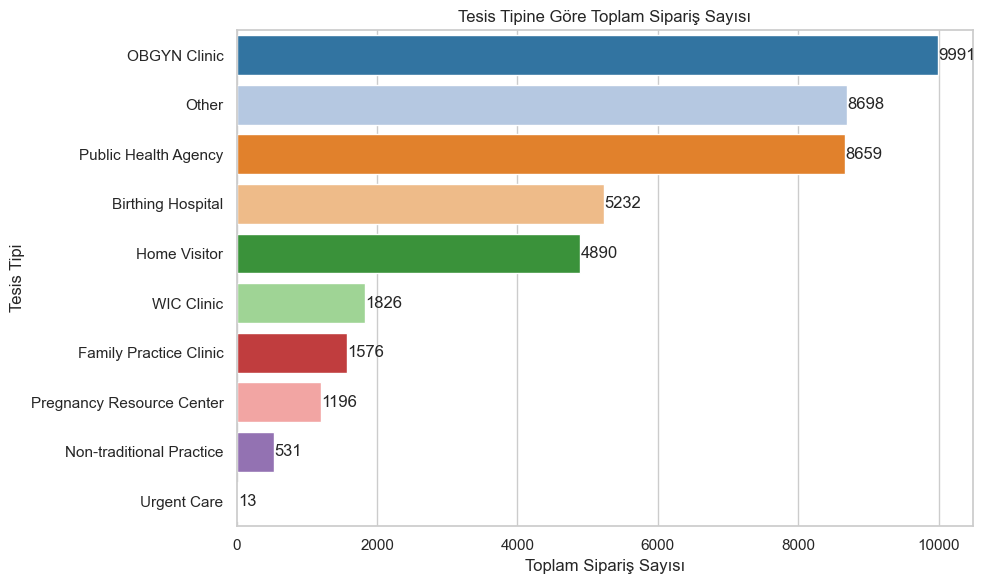

In [42]:
plt.figure(figsize=(10, 6))

colors = plt.cm.tab20.colors
bar1 = sns.barplot(
    data=facility_summary,
    x='total_orders',
    y='facility_type__c',
    palette=colors
)
plt.title('Tesis Tipine Göre Toplam Sipariş Sayısı')
plt.xlabel('Toplam Sipariş Sayısı')
plt.ylabel('Tesis Tipi')

# Etiket ekle
for p in bar1.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2,
             f'{int(width)}', va='center')

plt.tight_layout()
plt.savefig("facility_type_total_orders.png", dpi=300)
plt.show()


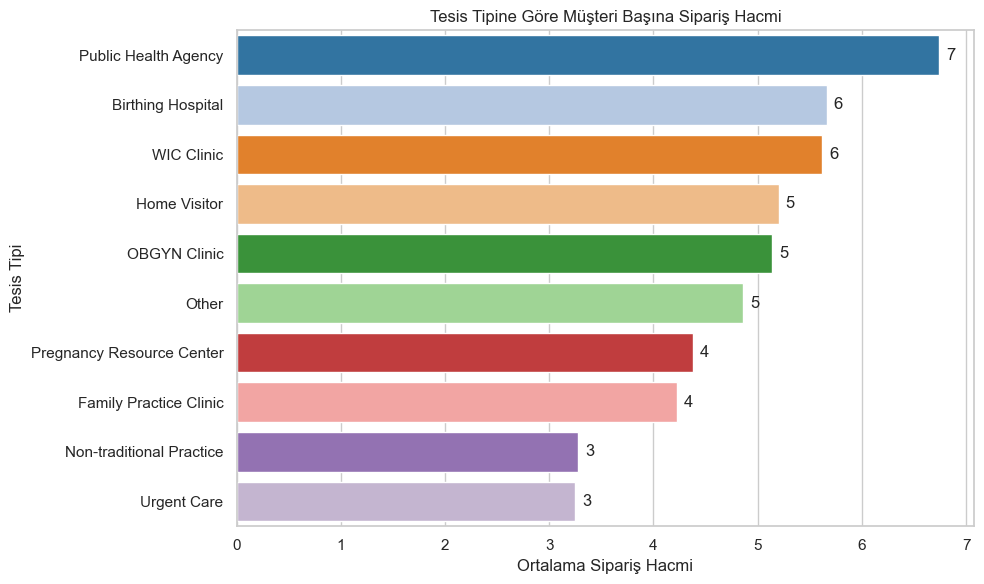

In [43]:
facility_sorted = facility_summary.sort_values(by="orders_per_customer", ascending=False)


fig_height = max(6, 0.5 * len(facility_sorted))
colors = plt.cm.tab20.colors

plt.figure(figsize=(10, fig_height))

bar2 = sns.barplot(
    data=facility_sorted,
    x='orders_per_customer',
    y='facility_type__c',
    palette=colors
)

plt.title('Tesis Tipine Göre Müşteri Başına Sipariş Hacmi')
plt.xlabel('Ortalama Sipariş Hacmi')
plt.ylabel('Tesis Tipi')

for p in bar2.patches:
    width = p.get_width()
    plt.text(width + (0.01 * max(facility_sorted['orders_per_customer'])), 
             p.get_y() + p.get_height() / 2,
             f'{width:.0f}', va='center')

plt.tight_layout()
plt.savefig("facilitytype_orders_per_customers.png", dpi=300)
plt.show()

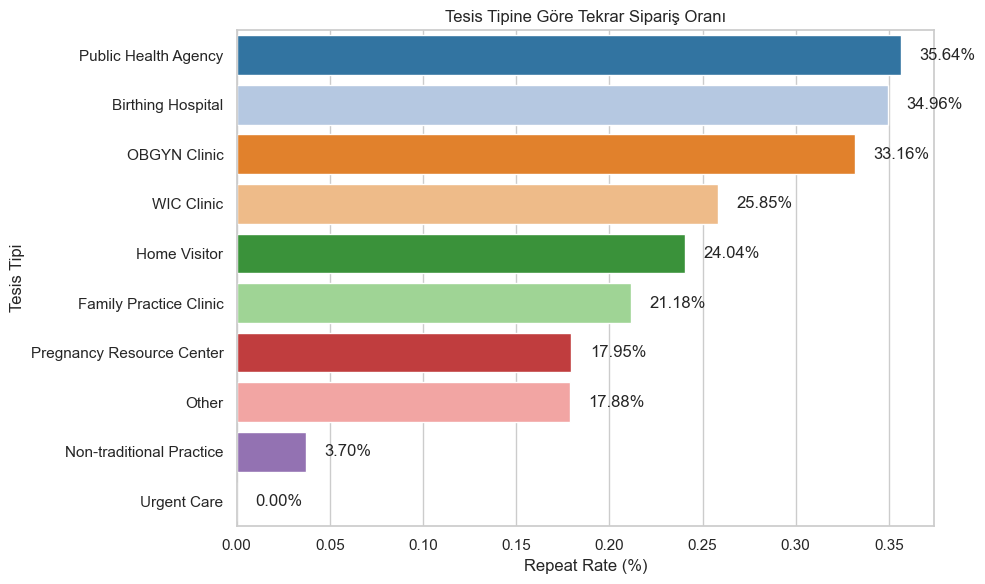

In [44]:
facility_sort = facility_summary.sort_values(by="repeat_rate", ascending=False)


colors = plt.cm.tab20.colors
plt.figure(figsize=(10, 6))
bar3 = sns.barplot(
    data=facility_sort,
    x='repeat_rate',
    y='facility_type__c',
    palette=colors
)
plt.title('Tesis Tipine Göre Tekrar Sipariş Oranı')
plt.xlabel('Repeat Rate (%)')
plt.ylabel('Tesis Tipi')

# Etiket ekle
for p in bar3.patches:
    width = p.get_width()
    plt.text(width + 0.01, p.get_y() + p.get_height() / 2,
             f'{width:.2%}', va='center')

plt.tight_layout()
plt.savefig("repeat_rate.png", dpi=300)
plt.show()


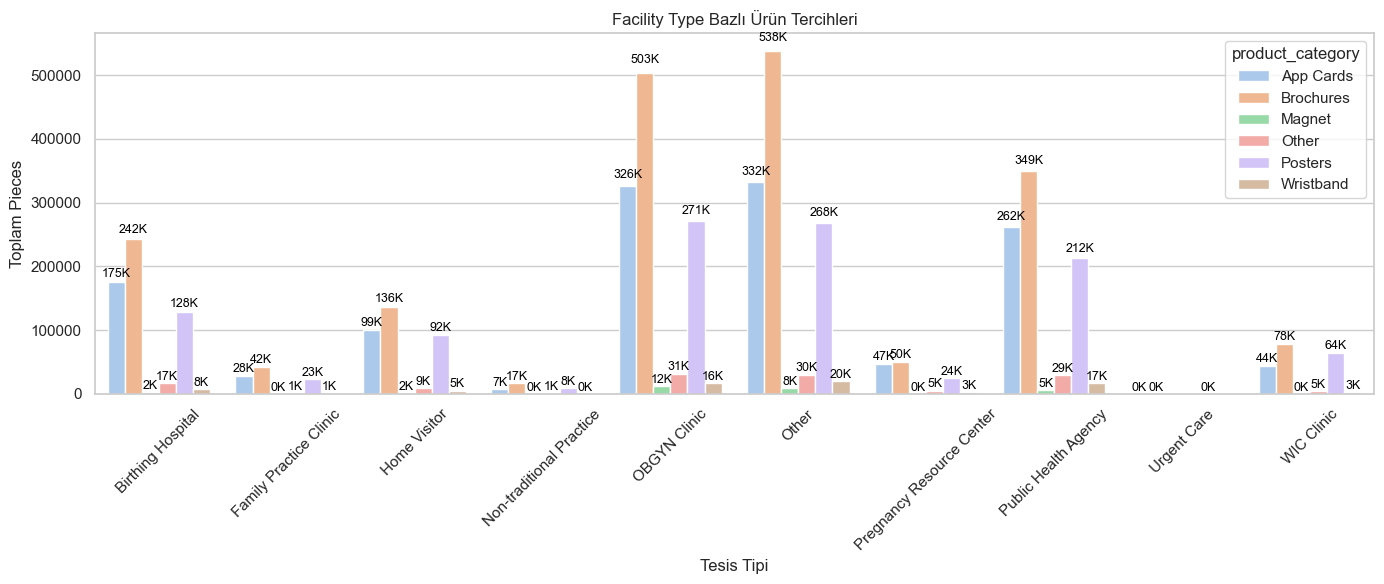

In [45]:


# Örnek veri (kendi df'inle değiştirebilirsin)
segment_product = (
    df.groupby(['facility_type__c', 'product_category'])['pieces']
    .sum()
    .reset_index()
)

# Grafik
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

bar = sns.barplot(
    data=segment_product,
    x='facility_type__c',
    y='pieces',
    hue='product_category',
    palette=palette
)

# Etiketleri 3 haneli (örn. 12K), yatay ve çubuğun üstüne yerleştir
for container in bar.containers:
    for bar_rect in container:
        height = bar_rect.get_height()
        if height > 0:
            short_label = f'{int(height / 1000)}K'
            bar.axes.text(
                bar_rect.get_x() + bar_rect.get_width() / 2,
                height + (0.02 * height),
                short_label,
                ha='center',
                va='bottom',
                fontsize=9,
                rotation=0,
                color='black'
            )

plt.title('Facility Type Bazlı Ürün Tercihleri')
plt.ylabel('Toplam Pieces')
plt.xlabel('Tesis Tipi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Gözlemler:
“Public Health Agency” (Kamu Sağlığı Kurumu) en yüksek siparişi veren tesis türü:

Bu, ABD bağış sektöründe kamu iş birliklerinin merkezde olduğunu gösterir.

Büyük çaplı halk sağlığı kampanyalarının ürün talebiyle desteklendiğini işaret eder.

“OBGYN Clinic” ve “School-Based Clinic” gibi hedefe yönelik sağlık tesisleri de yüksek katkı sağlamış:

Bu tesis türleri, doğrudan gençler, kadınlar ve okul topluluklarına hitap ettiği için kampanya etki alanı geniştir.

Ürünler muhtemelen doğrudan hizmet noktasında dağıtılıyor (örneğin App Cards, Brochures).

“Correctional Facility”, “University Clinic”, “Community-Based Org” gibi daha özel segmentler daha düşük hacimli:

Ya daha sınırlı erişimleri var ya da hedef kitle bu tesisler üzerinden daha az ulaşılıyor.

 Stratejik İçgörüler:
1. Ana Dağıtım Kanalları Belirlenmiş
Public Health Agencies ve OBGYN klinikler, bağış ürünlerinin temel dağıtım omurgasını oluşturuyor. Bu kanalların kapasitesi ve sadakati artırılmalı.

2. Hedef Odaklı Genişleme Fırsatları
School-based clinic gibi başarılı ama henüz doygunluk yaşamamış tesis türlerine yatırım büyüme potansiyeli taşır.

Community-based organization gibi düşük hacimli ama yerelde güçlü etki yaratabilecek kanallara özel pilot kampanyalar uygulanabilir.

3. Segment Bazlı Kampanya Tasarımı
Her tesis tipi için özel ürün setleri tanımlanabilir. Örneğin:

OBGYN → Brochure + App Card

School → Poster + Sticker

Public Health → Kit bazlı büyük siparişler

Public Health Agency:

En yüksek repeat rate (%35.6) ile en sadık müşteri kitlesine sahip.

Aynı zamanda müşteri başına sipariş sayısı da en yüksek: ~6.7. Bu tesis türüyle uzun vadeli iş birlikleri başarılı görünüyor.

OBGYN Clinic ve Birthing Hospital:

Hem yüksek sipariş hacmi hem de güçlü tekrar oranı ile öne çıkıyorlar.

Kadın sağlığına ve doğuma yönelik bu kurumlar, hedef kitleye direkt temas ettikleri için stratejik öneme sahip.

Home Visitor ve WIC Clinic:

Sipariş hacmi orta seviyede ama tekrar oranları nispeten düşük.

Bu tesislerde ürünlerin etkinliğini artırmak için kampanya desteği gerekebilir.

Non-traditional Practice ve Urgent Care:

Sipariş ve müşteri sayıları çok düşük.

Özellikle Urgent Care tipi tesislerde tekrar oranı sıfır. Bu segmentler belki kampanya dışı kalıyor ya da bağlam dışı.

 Stratejik İçgörüler:
Sadakat geliştirme: Public Health Agency gibi yüksek tekrar oranı olan tesisler, uzun vadeli programlar için ideal partnerler.

Eğitim & etkileşim artırımı: Düşük repeat rate görülen segmentlerde kullanıcı eğitimi, özel içerikli ürünler ya da doğrudan destek ile etkileşim artırılabilir.

Segment bazlı strateji: Sipariş verileri gösteriyor ki her tesis türü aynı şekilde işlemiyor. Ürün portföyü, iletişim dili ve dağıtım şekli bu segmentlere göre özelleştirilmeli.



Her tesis tipi farklı davranış sergiliyor. Örneğin OBGYN Clinic ve Public Health Agency yüksek hacim ve siparişe sahipken, Non-traditional Practice gibi gruplar düşük hacim ve sadakat oranı gösteriyor. Bu verilerle tesis tipi bazında özelleştirilmiş yaklaşımlar geliştirilebilir.”

BÖLGESEL ANALİZ

In [46]:


# --- Temel bölgesel özet ---
region_summary = df.groupby('region').agg(
    total_orders=('order no', 'count'),
    total_quantity=('quantity', 'sum'),
    unique_customers=('customer_account__c', pd.Series.nunique)
).reset_index()

# Müşteri başına sipariş sayısı
region_summary['orders_per_customer'] = region_summary['total_orders'] / region_summary['unique_customers']

# --- Repeat rate hesaplama ---
repeat_region = df.groupby(['region', 'customer_account__c'])['order no'].nunique().reset_index()
repeat_region['is_repeat'] = repeat_region['order no'] > 1
repeat_rate_region = repeat_region.groupby('region')['is_repeat'].mean().reset_index(name='repeat_rate')

# --- Birleştirme ---
region_summary = pd.merge(region_summary, repeat_rate_region, on='region')

# --- İsteğe bağlı: toplam siparişe göre sıralama ---
region_summary = region_summary.sort_values(by='total_orders', ascending=False)

# --- Sonuçları yazdır ---
display(region_summary)


,region,total_orders,total_quantity,unique_customers,orders_per_customer,repeat_rate
2,South,19081,51743,2796,6.824,0.328
0,Midwest,17884,40548,3378,5.294,0.340
3,West,3185,5941,568,5.607,0.298
1,Northeast,2462,6373,484,5.087,0.207


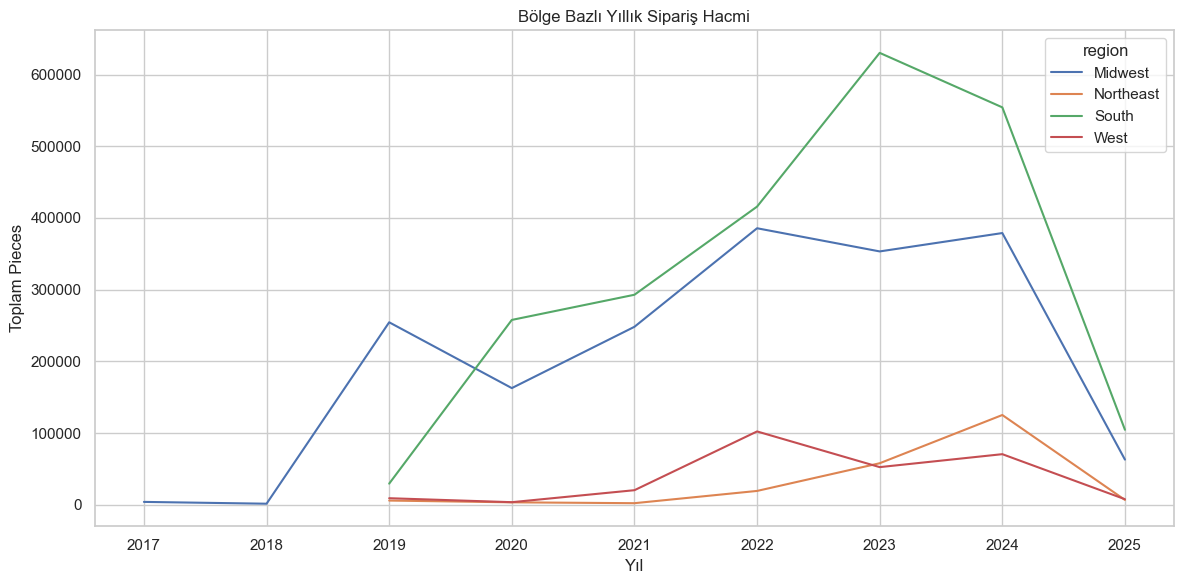

In [65]:
region_year = df.groupby(['region', 'order_year'])['pieces'].sum().unstack()
region_year.T.plot(figsize=(12, 6), title='Bölge Bazlı Yıllık Sipariş Hacmi')
plt.xlabel('Yıl')
plt.ylabel('Toplam Pieces')
plt.grid(True)
plt.tight_layout()
plt.savefig("yearly_region_sum.png", dpi=300)
plt.show()

In [48]:
# [1] Şehir bazında toplam sipariş, ürün hacmi ve müşteri sayısı
city_summary = df.groupby('shipping_city__c').agg(
    total_orders=('order no', 'nunique'),
    total_pieces=('pieces', 'sum'),
    unique_customers=('customer_account__c', 'nunique')
).reset_index()

# Müşteri başına ortalama sipariş hacmi
city_summary['orders_per_customer'] = city_summary['total_pieces'] / city_summary['unique_customers']
# [2] Tekrar sipariş veren müşterileri şehir özelinde belirle
city_repeat = df.groupby(['customer_account__c', 'shipping_city__c'])['order no'].nunique().reset_index(name='order_count')
city_repeat['is_repeat'] = city_repeat['order_count'] > 1

# [3] Her şehir için tekrar eden müşteri oranı
city_repeat_rate = city_repeat.groupby('shipping_city__c')['is_repeat'].mean().reset_index(name='repeat_rate')

# [4] Birleştir
city_summary = city_summary.merge(city_repeat_rate, on='shipping_city__c')
# [5] En yüksek sipariş sayısına göre sıralama
top_cities = city_summary.sort_values(by='total_orders', ascending=False).head(10)
display(top_cities)

,shipping_city__c,total_orders,total_pieces,unique_customers,orders_per_customer,repeat_rate
489,Columbus,163,49070,86,570.581,0.314
619,Des Moines,146,73769,64,1152.641,0.281
2654,Wichita,120,36151,47,769.170,0.340
441,Cincinnati,115,119455,59,2024.661,0.322
1121,Indianapolis,107,39995,60,666.583,0.367
1186,Kansas City,89,37645,53,710.283,0.321
1584,Montgomery,80,49432,29,1704.552,0.414
1807,Orlando,79,44870,40,1121.750,0.375
1302,Las Vegas,78,52615,42,1252.738,0.357
486,Columbia,70,25001,50,500.020,0.220


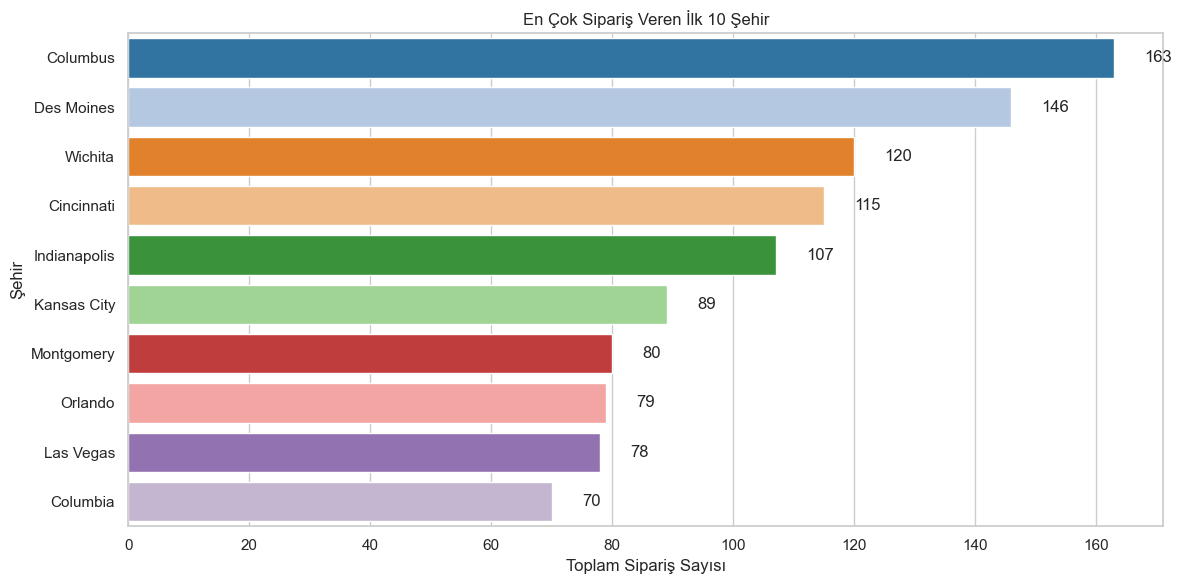

In [67]:


plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
colors = plt.cm.tab20.colors

# Sipariş sayısı grafiği
bar = sns.barplot(x='total_orders', y='shipping_city__c', data=top_cities, palette=colors)

# Etiket ekle
for p in bar.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2, int(width), va='center')

plt.title('En Çok Sipariş Veren İlk 10 Şehir')
plt.xlabel('Toplam Sipariş Sayısı')
plt.ylabel('Şehir')
plt.tight_layout()
plt.savefig("topcitysumorder.png", dpi=300)
plt.show()


1. Des Moines, Montgomery ve Las Vegas gibi şehirler dikkat çekiyor:
Des Moines: Görece düşük müşteri sayısına rağmen en yüksek müşteri başına sipariş oranına sahip (~1152). Bu, bu şehirde bağış materyallerinin daha derinlemesine, belki de yoğun hizmet veren az sayıda kurum üzerinden dağıtıldığını gösteriyor.

Montgomery: Sadece 29 müşteriyle çok yüksek parça dağıtımı (~1700 parça/müşteri). Buradaki organizasyonlar son derece aktif ve güçlü bağlar kurulmuş.

Las Vegas ve Orlando: Yüksek sipariş hacmi ve yüksek müşteri başına ürünle dikkat çekiyor.

 2. Cincinnati öne çıkıyor:
En yüksek toplam ürün hacmi (~120 bin adet) ile şehir lideri.

Aynı zamanda müşteri başına çok yüksek dağıtım ortalaması (2024) ile dikkat çekiyor. Bu şehirde büyük organizasyonlarla güçlü ilişkiler kurulmuş olabilir.

Stratejik İçgörüler
Yatırım ve Genişleme Fırsatları:
Cincinnati, Montgomery, Des Moines gibi şehirler, bağış etkisinin en yoğun olduğu ve ölçeklendirilebilir potansiyele sahip alanlardır.

Özellikle Montgomery gibi az sayıda ama çok aktif müşteri barındıran yerlerde yeni müşteriler edinmek bile büyük fark yaratabilir.

Sadakat Programları:
Indianapolis ve Orlando gibi yüksek tekrar oranı olan şehirler, sadakat programları, ödüllü kampanyalar ve takip sistemleriyle desteklenmeli.

Geliştirme Gereken Bölgeler:
Columbia gibi şehirlerde erişimi artırmak, yerel ortaklarla iş birliğini genişletmek veya neden düşük tekrar oranı olduğuna dair saha araştırması yapmak uygun olur.



SEGMENT BAZLI ANALİZ

In [50]:
# [3.1] Tesis bazlı toplam sipariş, toplam ürün ve müşteri sayısı
df_segment = df.groupby('facility_type__c').agg(
    total_orders=('order no', 'nunique'),
    total_quantity=('pieces', 'sum'),
    unique_customers=('customer_account__c', 'nunique')
).reset_index()

# [3.2] Müşteri başına sipariş hacmi
df_segment['orders_per_customer'] = df_segment['total_quantity'] / df_segment['unique_customers']


In [51]:
# [3.3] Ortalama sipariş adedi ve ortalama hacim
x_mean = df_segment['orders_per_customer'].mean()
y_mean = df_segment['total_orders'].mean()


In [52]:
# [3.4] Segment fonksiyonu
def classify_segment(row):
    if row['orders_per_customer'] >= x_mean and row['total_orders'] >= y_mean:
        return 'Yüksek Hacim & Yüksek Sipariş (Altın Segment)'
    elif row['orders_per_customer'] >= x_mean:
        return 'Yüksek Hacim & Düşük Sipariş (Potansiyel)'
    elif row['total_orders'] >= y_mean:
        return 'Düşük Hacim & Yüksek Sipariş (Tutarsız)'
    else:
        return 'Düşük Hacim & Düşük Sipariş (Düşük Öncelik)'

# [3.5] Segment etiketi ekle
df_segment['segment_kategorisi'] = df_segment.apply(classify_segment, axis=1)

df_segment[['facility_type__c', 'total_orders', 'orders_per_customer', 'segment_kategorisi']]


,facility_type__c,total_orders,orders_per_customer,segment_kategorisi
0,Birthing Hospital,1579,621.150,Yüksek Hacim & Yüksek Sipariş (Altın Segment)
1,Family Practice Clinic,516,263.247,Düşük Hacim & Düşük Sipariş (Düşük Öncelik)
2,Home Visitor,1341,368.238,Düşük Hacim & Yüksek Sipariş (Tutarsız)
3,Non-traditional Practice,170,221.420,Düşük Hacim & Düşük Sipariş (Düşük Öncelik)
4,OBGYN Clinic,3434,597.597,Yüksek Hacim & Yüksek Sipariş (Altın Segment)
5,Other,2487,669.749,Yüksek Hacim & Yüksek Sipariş (Altın Segment)
6,Pregnancy Resource Center,364,484.110,Yüksek Hacim & Düşük Sipariş (Potansiyel)
7,Public Health Agency,2291,682.751,Yüksek Hacim & Yüksek Sipariş (Altın Segment)
8,Urgent Care,4,238.750,Düşük Hacim & Düşük Sipariş (Düşük Öncelik)
9,WIC Clinic,482,602.720,Yüksek Hacim & Düşük Sipariş (Potansiyel)


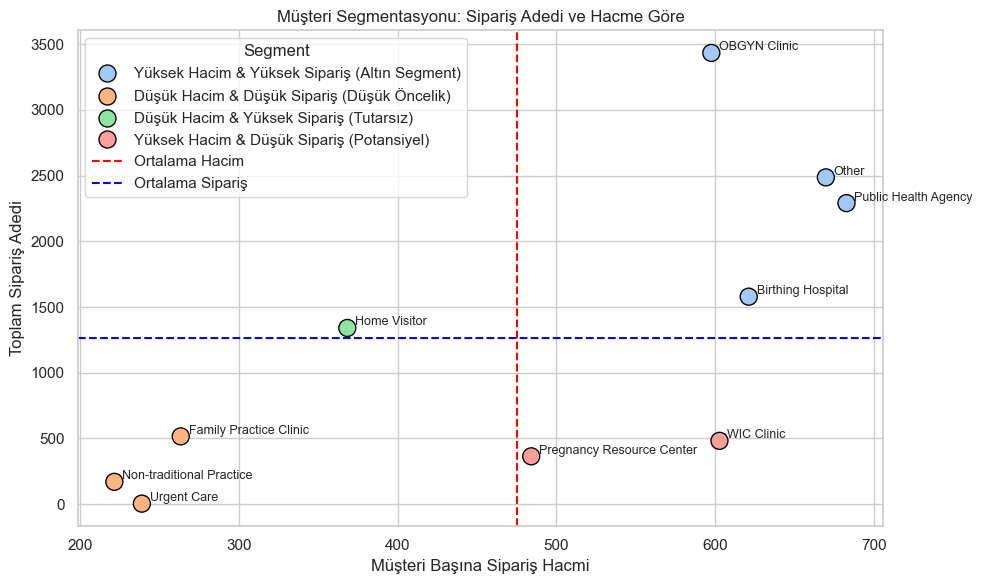

In [69]:


plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# [3.6] Segmentlere göre scatter plot
scatter = sns.scatterplot(
    data=df_segment,
    x='orders_per_customer',
    y='total_orders',
    hue='segment_kategorisi',
    s=150,
    palette='pastel',
    edgecolor='black'
)

# Ortalamaları gösteren çizgiler
plt.axvline(x=x_mean, color='red', linestyle='--', label='Ortalama Hacim')
plt.axhline(y=y_mean, color='blue', linestyle='--', label='Ortalama Sipariş')


# Etiket ekle
for idx, row in df_segment.iterrows():
    plt.text(row['orders_per_customer'] + 5, row['total_orders'] + 20, row['facility_type__c'], fontsize=9)

plt.title('Müşteri Segmentasyonu: Sipariş Adedi ve Hacme Göre')
plt.xlabel('Müşteri Başına Sipariş Hacmi')
plt.ylabel('Toplam Sipariş Adedi')
plt.legend(title='Segment')
plt.tight_layout()
plt.savefig("segmen.png", dpi=300)
plt.show()


Altın Segment (Yüksek Hacim & Yüksek Sipariş):
OBGYN Clinic, Public Health Agency, Birthing Hospital, Other tesisleri bu kategoride.

Bu gruplar, sistemin bel kemiği. Siparişleri hem sık hem de büyük hacimli.

Strateji: Sadakat programı, kişisel temsilci atamaları ve özel kampanyalarla bu gruplar elde tutulmalı.

Potansiyel Segment (Yüksek Hacim & Düşük Sipariş):
Pregnancy Resource Center ve WIC Clinic bu kategoride.

Az sipariş veriyorlar ama verdiklerinde hacim yüksek → “sessiz ama değerli” müşteriler.

Strateji: Bu grup tekrar siparişe teşvik edilmeli (örneğin: otomatik sipariş, hatırlatma e-postaları).

Tutarsız Segment (Düşük Hacim & Yüksek Sipariş):
Home Visitor tek başına bu grupta.

Sık sipariş veriyor ama hacmi düşük — yüksek işlem maliyeti riski taşıyor.

Strateji: Siparişleri konsolide etmeye teşvik edilmeli (örneğin: paket önerileri).

Düşük Öncelik Segmenti (Düşük Hacim & Düşük Sipariş):
Family Practice Clinic, Non-traditional Practice, Urgent Care bu segmentte.

Sipariş sayısı az, hacim de küçük → yatırım geri dönüşü düşük.

Strateji: Bu gruplara düşük maliyetli temas stratejileri uygulanmalı veya kapsam dışı bırakılabilir.

Genel Sunum Yorumu:
“Tesisleri tekil analiz etmek yerine, sipariş davranışlarına göre segmente etmek; stratejiyi hedefli hale getiriyor. Kaynaklarımızı Altın Segment’e yoğunlaştırıp, Potansiyel Segment’te büyümeyi tetikleyebiliriz. Düşük değerli segmentlerde ise maliyet-etkinlik değerlendirmesi yapılmalı.”

 Segmentasyonu Nasıl Oluşturduk? (Hoca kesin sorar :))
Segmentleri oluştururken iki temel metriği kullandık:

Toplam Sipariş Sayısı: Tesisin sistemle ne kadar sık etkileşime geçtiğini gösterir.

Müşteri Başına Ortalama Sipariş Hacmi: Tesise bağlı her müşterinin ortalama olarak ne kadar ürün sipariş ettiğini ölçer.

Bu iki metriğin ortalaması alınarak, her tesis tipi bu eşiklere göre dört segmente ayrıldı:

Altın Segment: Hem sık hem de yüksek hacimli sipariş verenler

Potansiyel Segment: Az sipariş verir ama hacmi yüksektir

Tutarsız Segment: Sık sipariş verir ama hacmi düşüktür

Düşük Öncelik Segmenti: Hem az hem küçük sipariş verir

Bu segmentasyon sayesinde tesisleri sadece isimlerine göre değil, gerçek sipariş davranışlarına göre sınıflandırarak hedefli stratejiler geliştirebiliyoruz.




In [54]:
# [4.1] Her müşteri için yıl, tesis türü ve segment bilgisi
df_yearly = df[['order_year', 'facility_type__c', 'customer_account__c']].drop_duplicates()
df_yearly = df_yearly.merge(df_segment[['facility_type__c', 'segment_kategorisi']], on='facility_type__c', how='left')


In [55]:
# [4.2] Hangi segmentte hangi yıl kimler vardı?
customer_by_year_segment = df_yearly.groupby(['order_year', 'segment_kategorisi'])['customer_account__c'].unique().reset_index()


In [56]:
# [4.3] Yıllar arası churn hesaplaması
results = []
years = sorted(df_yearly['order_year'].dropna().unique())

for i in range(len(years)-1):
    y1, y2 = years[i], years[i+1]
    df_y1 = customer_by_year_segment[customer_by_year_segment['order_year'] == y1]
    df_y2 = customer_by_year_segment[customer_by_year_segment['order_year'] == y2]

    for segment in df_y1['segment_kategorisi'].unique():
        set_y1 = set(df_y1[df_y1['segment_kategorisi'] == segment]['customer_account__c'].explode())
        set_y2 = set(df_y2[df_y2['segment_kategorisi'] == segment]['customer_account__c'].explode()) if segment in df_y2['segment_kategorisi'].values else set()
        churned = set_y1 - set_y2
        churn_rate = len(churned) / len(set_y1) if set_y1 else 0
        results.append({
            'segment_kategorisi': segment,
            'yil': f"{y1}→{y2}",
            'musteri_sayisi_y1': len(set_y1),
            'tekrar_siparis_y2': len(set_y1 & set_y2),
            'churn_edilen': len(churned),
            'churn_orani': round(churn_rate, 3)
        })

churn_df = pd.DataFrame(results)
display(churn_df)


,segment_kategorisi,yil,musteri_sayisi_y1,tekrar_siparis_y2,churn_edilen,churn_orani
0,Yüksek Hacim & Yüksek Sipariş (Altın Segment),2017→2018,6,1,5,0.833
1,Düşük Hacim & Düşük Sipariş (Düşük Öncelik),2018→2019,1,0,1,1.000
2,Yüksek Hacim & Yüksek Sipariş (Altın Segment),2018→2019,8,2,6,0.750
3,Düşük Hacim & Düşük Sipariş (Düşük Öncelik),2019→2020,62,5,57,0.919
4,Yüksek Hacim & Yüksek Sipariş (Altın Segment),2019→2020,562,121,441,0.785
5,Düşük Hacim & Düşük Sipariş (Düşük Öncelik),2020→2021,68,9,59,0.868
6,Yüksek Hacim & Yüksek Sipariş (Altın Segment),2020→2021,703,163,540,0.768
7,Düşük Hacim & Düşük Sipariş (Düşük Öncelik),2021→2022,59,13,46,0.780
8,Düşük Hacim & Yüksek Sipariş (Tutarsız),2021→2022,124,17,107,0.863
9,Yüksek Hacim & Düşük Sipariş (Potansiyel),2021→2022,65,14,51,0.785


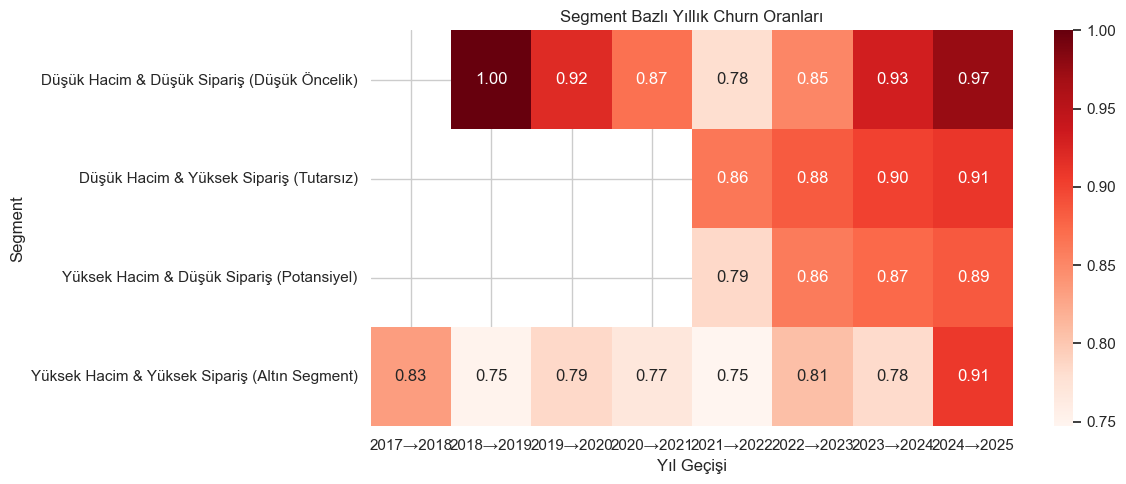

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot tablo: yıllara göre segment churn oranları
pivot_churn = churn_df.pivot(index='segment_kategorisi', columns='yil', values='churn_orani')

plt.figure(figsize=(12, 5))
sns.heatmap(pivot_churn, annot=True, cmap='Reds', fmt='.2f')
plt.title('Segment Bazlı Yıllık Churn Oranları')
plt.ylabel('Segment')
plt.xlabel('Yıl Geçişi')
plt.tight_layout()
plt.savefig("churn.png", dpi=300)
plt.show()


"En kritik bulgumuz şu: Hangi segment olursa olsun, churn oranlarımız oldukça yüksek. Tüm segmentlerde yıl sonunda müşterilerimizin en az %75’i tekrar sipariş vermemiş. Bu tablo, sadakat problemini net olarak gözler önüne seriyor."

 Altın Segment'e Bakalım:

"Yüksek hacim ve sık sipariş veren en değerli müşterilerimiz burada yer alıyor. Fakat dikkat edin:
2023’te bu segmentte 1.729 müşteri vardı. 2024’te bunların yalnızca 376’sı tekrar sipariş verdi.
Yani %78’i kaybedildi.
2024’ten 2025’e geçerken bu oran daha da kötüleşiyor: %90’ın üzerinde churn var."

Potansiyel Segment:

"Bu müşteriler büyük hacimli sipariş veriyor ama az sıklıkta. Bu da demek oluyor ki, sipariş verince değer yaratıyorlar ama düzenli değiller.
Churn oranı burada da %85–88 seviyelerinde. Yani bu grup var ama 'uyuyor'."

Tutarsız Segment:

"Bu segment sık sipariş veriyor ama küçük hacimle. Onlar da kayıp veriyor: %86–91 churn arasında gidip geliyor.
Yani biz aslında 'hareketli ama düşük değerli' bir müşteri grubunu da tutamıyoruz."

Düşük Öncelik Segmenti:

"Zaten hacmi ve siparişi düşük olan bu segment neredeyse tamamen kaybediliyor.
2024’ten 2025’e geçerken %97’si gitti. Burada çok büyük bir yatırım yapılmaması gerektiği net."

Stratejik Kapanış Cümlesi:

"Toparlarsak; müşteri kazanmak kadar, hatta daha da önemlisi, elde tutmak.
Bu tablo bize şunu gösteriyor: Elde tutma mekanizmalarımız eksik.
Churn oranlarını düşürmeden sürdürülebilir büyüme sağlanamaz.
Sadakat sistemleri, segment bazlı iletişim ve otomatik takip sistemleri acilen devreye alınmalı."

DİL VE SİPARİŞ HACMİ ANALİZİ

In [58]:
# Her sipariş için toplam ürün adedi (pieces) hesaplanır
order_quantity = df.groupby('order no')['pieces'].sum()

# Ortalama ürün hacmi: toplam ürün / toplam sipariş
avg_pieces_per_order = order_quantity.mean()

print(f"Sipariş başına ortalama ürün hacmi: {avg_pieces_per_order:.2f} parça")


Sipariş başına ortalama ürün hacmi: 364.94 parça


In [59]:
# [5.1] Ürün ve dil bazında toplam sipariş hacmi
lang_product = df.groupby(['product_category', 'language'])['pieces'].sum().reset_index()
lang_product = lang_product.sort_values(by='pieces', ascending=False)

display(lang_product.head(10))  # En çok kullanılan ürün-dil çiftleri


,product_category,language,pieces
6,Brochures,English,1259438
1,App Cards,English,732147
18,Posters,English,696290
9,Brochures,Spanish,586551
3,App Cards,Spanish,366291
21,Posters,Spanish,343725
4,App Cards,Unknown,215926
16,Other,Unknown,131679
10,Brochures,Unknown,102706
26,Wristband,Unknown,60099


In [60]:
# Tesis Tipine göre ortalama sipariş hacmi
avg_by_facility = (
    df.groupby(['facility_type__c', 'order no'])['pieces'].sum()
    .groupby('facility_type__c')
    .mean()
    .reset_index(name='avg_pieces_per_order')
)

display(avg_by_facility)


,facility_type__c,avg_pieces_per_order
0,Birthing Hospital,363.485
1,Family Practice Clinic,190.293
2,Home Visitor,258.124
3,Non-traditional Practice,211.000
4,OBGYN Clinic,338.476
5,Other,482.047
6,Pregnancy Resource Center,363.082
7,Public Health Agency,382.948
8,Urgent Care,238.750
9,WIC Clinic,406.398


In [61]:
# Sipariş hacmini siparişe göre grupla
df['order_year'] = df['order_date__c'].dt.year

# Önce segmentleri tekrar hesapla
segment_table = (
    df.groupby(['facility_type__c', 'customer_account__c'])
    .agg(total_orders=('order no', 'nunique'),
         total_quantity=('pieces', 'sum'))
    .reset_index()
)

segment_table['orders_per_customer'] = segment_table['total_quantity'] / segment_table['total_orders']

# Tesis tipinden segment çıkar
segment_map = df.groupby('facility_type__c').agg(
    total_orders=('order no', 'nunique'),
    total_quantity=('pieces', 'sum'),
    unique_customers=('customer_account__c', 'nunique')
).reset_index()

segment_map['orders_per_customer'] = segment_map['total_quantity'] / segment_map['unique_customers']
x_mean = segment_map['orders_per_customer'].mean()
y_mean = segment_map['total_orders'].mean()

def classify_segment(row):
    if row['orders_per_customer'] >= x_mean and row['total_orders'] >= y_mean:
        return 'Altın Segment'
    elif row['orders_per_customer'] >= x_mean:
        return 'Potansiyel'
    elif row['total_orders'] >= y_mean:
        return 'Tutarsız'
    else:
        return 'Düşük Öncelik'

segment_map['segment'] = segment_map.apply(classify_segment, axis=1)

# Ana df'e segmenti bağla
df = df.merge(segment_map[['facility_type__c', 'segment']], on='facility_type__c', how='left')

# Pivot tablo: yıl x segment
pivot = df.groupby(['order_year', 'segment'])['pieces'].mean().unstack().round(1)

In [62]:
# [5.2] Pivot tablo oluştur (heatmap için)
pivot_lang_product = lang_product.pivot(index='product_category', columns='language', values='pieces').fillna(0)


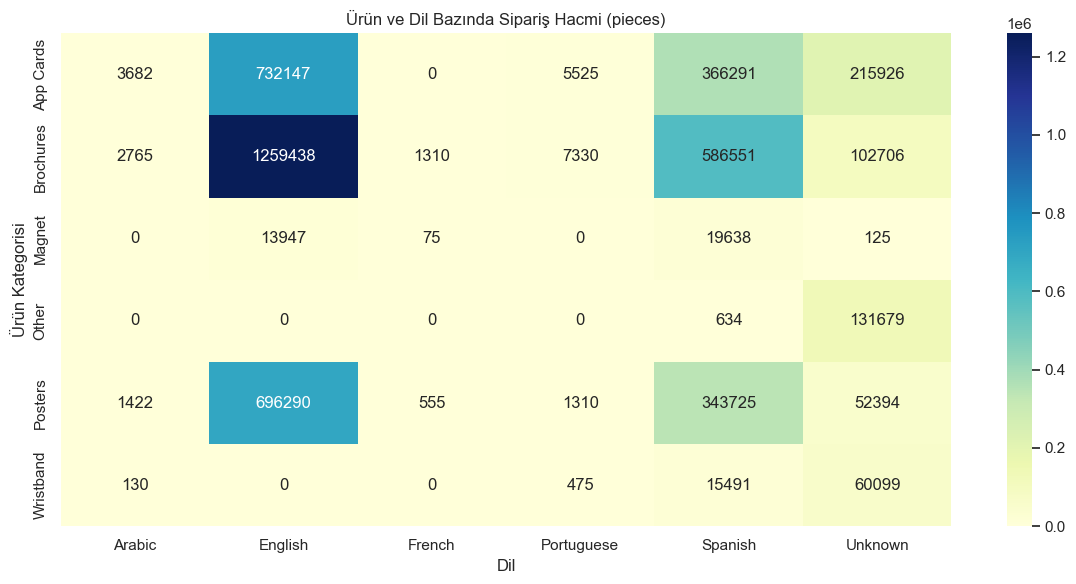

In [63]:


plt.figure(figsize=(12, 6))
sns.heatmap(pivot_lang_product, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Ürün ve Dil Bazında Sipariş Hacmi (pieces)")
plt.xlabel("Dil")
plt.ylabel("Ürün Kategorisi")
plt.tight_layout()
plt.show()


“En yoğun sipariş edilen ürün kategorileri App Cards, Brochures ve Posters’tır. En çok tercih edilen dil açık ara İngilizce olsa da İspanyolca da Brochure ve App Cards'ta güçlü kullanım göstermektedir. Arapça, Fransızca ve Portekizce düşük seviyede ancak hâlâ stratejik önemi olabilir. Lokal içerik stratejileri bu verilere göre şekillendirilebilir.”

In [64]:
# Heatmap için pivot edilmiş veri
heatmap_data = lang_product_summary.pivot(
    index='product_category', columns='language', values='percentage'
)

# Yüzdelik sayıları % işareti ile birlikte yazmak için string'e çevir
annot_data = heatmap_data.applymap(lambda x: f'{x:.0f}%' if x > 0 else '0%')

plt.figure(figsize=(14, 9))
sns.heatmap(
    heatmap_data,
    annot=annot_data,        # yüzde işaretli anotasyonlar
    fmt='',                  # artık string olduğu için format yok
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Percentage (%)'},
    annot_kws={"size": 15, "weight": "bold"}  # büyük ve kalın font
)

plt.title("Her Dil İçin Ürün Kategorilerinin Yüzdesel Dağılımı", fontsize=16, pad=15)
plt.xlabel("Dil", fontsize=13)
plt.ylabel("Ürün Kategorisi", fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.savefig("heatmap_language.png", dpi=300)
plt.show()


NameError: name 'lang_product_summary' is not defined